In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

plt.rcParams['figure.figsize'] = [10.0, 6.0]

%matplotlib inline

In [12]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#E5E5E5',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.forma

In [2]:
df = pd.read_csv("/data/insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Single variable plotting strategy

Text(0.5,1,'Histogram of charges')

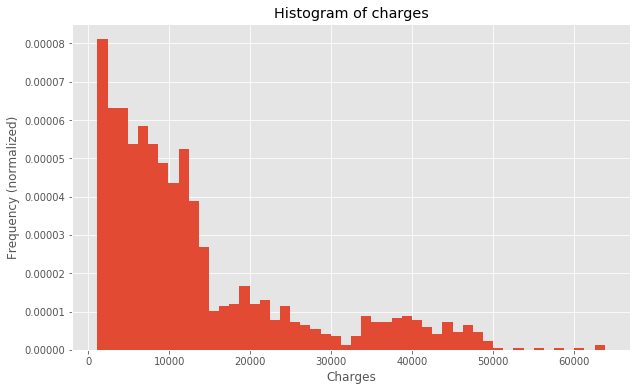

In [20]:
plt.figure(figsize = (10, 6))
df.charges.plot.hist(bins = 50, normed = True)
plt.xlabel("Charges")
plt.ylabel("Frequency (normalized)")
plt.title("Histogram of charges")

Text(0.5,1,'Density plot of charges')

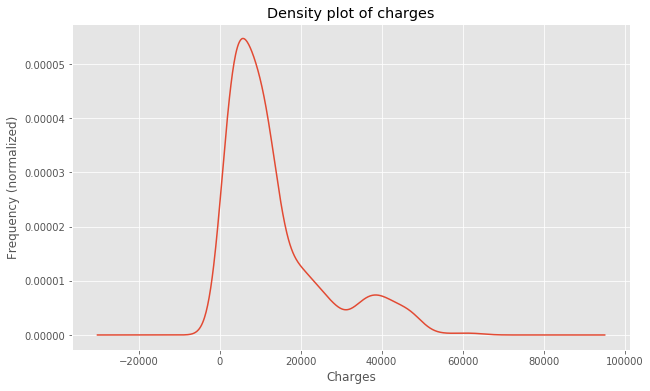

In [22]:
plt.figure(figsize = (10, 6))
df.charges.plot.density()
plt.xlabel("Charges")
plt.ylabel("Frequency (normalized)")
plt.title("Density plot of charges")

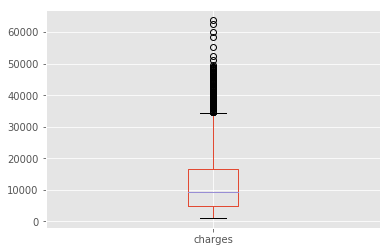

In [23]:
df.charges.plot.box()

In [30]:
def outliers(y):
    q1, q2, q3 = np.percentile(y, [25, 50, 75])
    iqr = q3 - q1
    upper_whisker = min(np.max(y), q3 + 1.5 * iqr)
    lower_whisker = max(np.min(y), q1 - 1.5 * iqr)
    print("Lower whisker: %f, upper whisker: %f" % (lower_whisker, upper_whisker))
    return (y < lower_whisker) | (y > upper_whisker)

In [31]:
df[outliers(df.charges)]

Lower whisker: 1121.873900, upper whisker: 34489.350562


,age,gender,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100
49,36,male,35.200,1,yes,southeast,38709.17600
53,36,male,34.430,0,yes,southeast,37742.57570


What do we do about the outliers?
A. cap the values 
B. remove the observation (leads to data loss)
C. Log transformation (.... most commonly done)

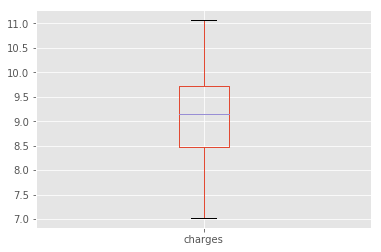

In [32]:
np.log(df.charges).plot.box()

Text(0.5,1,'Frequency plot by region')

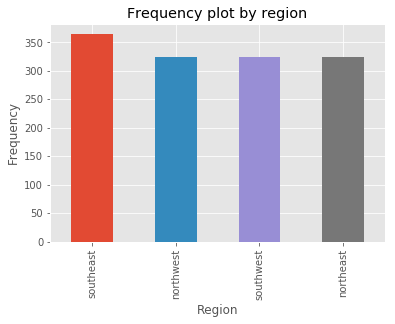

In [37]:
df.region.value_counts().plot.bar()
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Frequency plot by region")

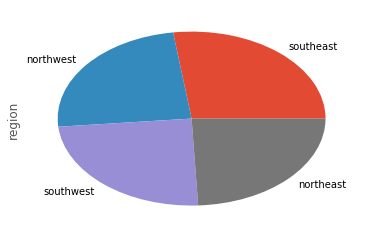

In [38]:
df.region.value_counts().plot.pie()

# Association plot

Text(0.5,1,'Charges by BMI')

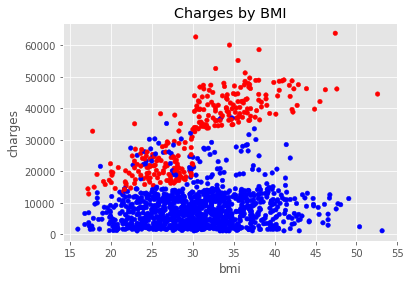

In [44]:
# Cont vs cont -> scatter plots
colors = np.where(df.smoker == "yes", "red", "blue")
df.plot.scatter("bmi", "charges", color = colors)
plt.title("Charges by BMI")

Text(0,0.5,'Mean charges')

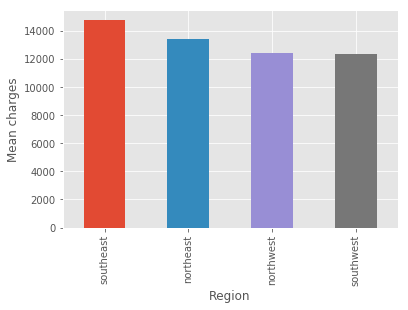

In [84]:
# Cont vs categorical
df.groupby("region").charges.mean().sort_values(ascending = False).plot.bar()
plt.xlabel("Region")
plt.ylabel("Mean charges")

In [53]:
import seaborn as sns

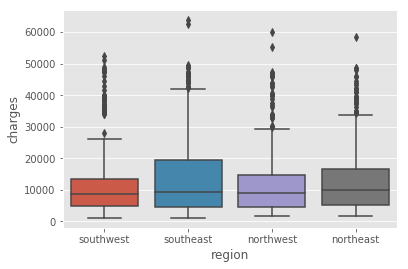

In [54]:
sns.boxplot("region", "charges", data=df)

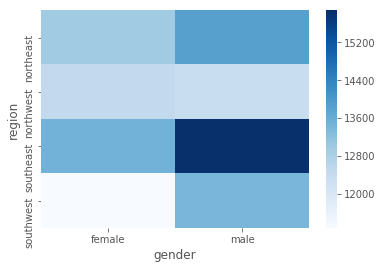

In [60]:
# Categorical vs categorical -> heat map or tile plot
summary = df.pivot_table("charges", "region", "gender")
sns.heatmap(summary, cmap=plt.cm.Blues)

# Time series plot

In [75]:
airlines = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/airline-passengers.csv")

In [76]:
airlines.head()

,Date,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [77]:
airlines.head()

,Date,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [79]:
airlines.index = pd.to_datetime(airlines.Date, format="%Y-%M")

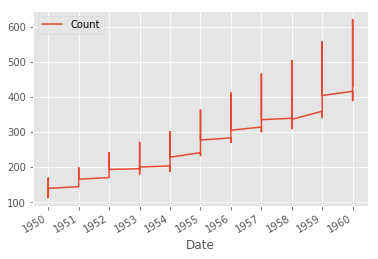

In [82]:
airlines["1950":].plot()